# Capstone Project - The Battle of the Neighborhoods

## Table of contents

- Introduction: Business Problem
- Data
    - Collecting New York neighborhood data
    - Retrieving locations of New York neighborhoods
    - Plotting New York neighborhoods on map
    - Retrieving nearby venues using Foursquare
    - Extracting local restaurants
- Clustering and mapping neighborhoods
    - Prepare restaurant data for clustering process
    - Cluster neighborhoods by restaurant type
    - Mapping clustered neighborhoods
- Exploratory Data Analysis


- Methodology*
- Results and Discussion*
- Conclusion*

***Section is available in report and presentation only**

## Introduction: Business Problem 

In this project we will try to find dominant restaurant types in New York. Specifically, this report will be targeted to travel agents who manage holiday trip packages to New York and chose stay locations for their clients followed by their cuisine preferences. 

We will explore all neighborhoods in New York and identify prevailing type of restaurants within each. 

Finally, we will try segmenting our locations based on cuisine type and apply color coding to differentiate those locations on the map.

## Data

Here are the key data points listed below that need to be collected:

1. New York neighborhoods


2. Location of neighborhoods


3. Restaurant data

### Let's first import all necessary libraries required for our project 

To avoid error in the execution, matpllotlib may need to be reinstalled first

In [ ]:
# pip uninstall matplotlib --y

In [ ]:
# pip install matplotlib

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if not installed

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.12.0             |     pyhd8ed1ab_0          96 KB  conda-forge
    aiohttp-3.7.4              |   py37h5e8e339_0         632 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
   

llvm-openmp-11.1.0   | 4.7 MB    | ##################################### | 100% 
freetds-1.1.15       | 2.4 MB    | ##################################### | 100% 
biopython-1.78       | 2.6 MB    | ##################################### | 100% 
libglib-2.68.1       | 3.1 MB    | ##################################### | 100% 
nspr-4.30            | 233 KB    | ##################################### | 100% 
jeepney-0.6.0        | 32 KB     | ##################################### | 100% 
jupyterlab_widgets-1 | 130 KB    | ##################################### | 100% 
lzo-2.10             | 314 KB    | ##################################### | 100% 
sip-4.19.25          | 295 KB    | ##################################### | 100% 
icu-68.1             | 13.0 MB   | ##################################### | 100% 
pycparser-2.20       | 94 KB     | ##################################### | 100% 
plotly-4.14.3        | 5.9 MB    | ##################################### | 100% 
tensorflow-estimator | 645 K

urllib3-1.26.4       | 99 KB     | ##################################### | 100% 
pyparsing-2.4.7      | 60 KB     | ##################################### | 100% 
libevent-2.1.10      | 1.1 MB    | ##################################### | 100% 
requests-2.25.1      | 51 KB     | ##################################### | 100% 
libgfortran4-7.5.0   | 1.3 MB    | ##################################### | 100% 
pytest-6.2.3         | 430 KB    | ##################################### | 100% 
freetype-2.10.4      | 890 KB    | ##################################### | 100% 
markupsafe-1.1.1     | 27 KB     | ##################################### | 100% 
nest-asyncio-1.5.1   | 9 KB      | ##################################### | 100% 
toml-0.10.2          | 18 KB     | ##################################### | 100% 
readline-8.0         | 281 KB    | ##################################### | 100% 
locket-0.2.0         | 6 KB      | ##################################### | 100% 
gettext-0.19.8.1     | 3.6 M

traitlets-5.0.5      | 81 KB     | ##################################### | 100% 
widgetsnbextension-3 | 1.8 MB    | ##################################### | 100% 
krb5-1.17.2          | 1.4 MB    | ##################################### | 100% 
click-7.1.2          | 64 KB     | ##################################### | 100% 
opt_einsum-3.3.0     | 53 KB     | ##################################### | 100% 
blas-1.0             | 1 KB      | ##################################### | 100% 
backports-1.0        | 4 KB      | ##################################### | 100% 
liblapack-3.9.0      | 11 KB     | ##################################### | 100% 
async_generator-1.10 | 18 KB     | ##################################### | 100% 
oauthlib-3.0.1       | 82 KB     | ##################################### | 100% 
matplotlib-3.4.1     | 7 KB      | ##################################### | 100% 
pickleshare-0.7.5    | 9 KB      | ##################################### | 100% 
entrypoints-0.3      | 8 KB 

done


In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
#matplotlib.__version__

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import re

from bs4 import BeautifulSoup # this module helps in web scrapping.

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if not installed
import folium # map rendering library

#!conda install -c conda-forge geopy --yes # uncomment this line if not installed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')

Libraries imported.


### Collecting neighborhood data for New York

Data is extracted from Wikipedia page where all New York neighborhoods are listed in the table. 

Our output will be saved in a dataframe which will contain the folowing 2 fields: "Community Board(CB)" and "Neighborhoods"

In [3]:
url = "https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City"
data  = requests.get(url).text 
soup = BeautifulSoup(data,"html5lib") 

In [4]:
right_table=soup.find('table', class_ = 'wikitable sortable')
dfraw = pd.read_html(str(right_table))

In [5]:
df = pd.DataFrame(dfraw[0])
df= df[['Community Board(CB)','Neighborhoods']]

In [6]:
print(df.shape)
df.head()

(60, 2)


,Community Board(CB),Neighborhoods
0,Bronx CB 1,"Melrose, Mott Haven, Port Morris"
1,Bronx CB 2,"Hunts Point, Longwood"
2,Bronx CB 3,"Claremont, Concourse Village, Crotona Park, Mo..."
3,Bronx CB 4,"Concourse, Highbridge"
4,Bronx CB 5,"Fordham, Morris Heights, Mount Hope, Universit..."


As we can see from retrieved dataframe above, some community areas have represent multiple neighborhoods. 

In order to produce a relevant address search request for GeoPy locator, we need to create a new "address" field by splitting neghborhoods and assigning them to a relevant community board. We will use this new "address" field to extract long/lat data into adjacent new columns using GeoPy locator. 

While code is running, addresses located by GeoPy will be prinnted.

### Retrieving locations of New York neighborhoods

In [7]:
table_contents=[]

for i in df.itertuples():
    
    string = str(i[2]).split(',')
    #print(string)
    
    for nei in string:  
        cell = {}
        cell['Borough'] = i[1]
        cell['Neighborhood'] = nei.strip()
        address = i[1] + ', ' + nei.strip()
        address = (re.sub('\W+',' ',address).strip())
        address = address.replace("CB ","CB")
        #print(address)        
        cell['Address'] = address
        
        
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        print(location)
        if location is None:
            pass
            #print('None')
        else:
            #print(location.latitude)
            cell['Latitude'] = location.latitude
            cell['Longitude'] = location.longitude
        
        #print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))
        table_contents.append(cell)
        
print('Geolocation completed')


Melrose, East 162nd Street, The Bronx, Bronx County, New York, 10451, United States
Mott Haven, Bronx County, New York, 10454-4606, United States
Port Morris, Bronx County, New York, 10454, United States
Hunts Point, Bronx County, New York, 10474, United States
Longwood Avenue, Southern Boulevard, The Bronx, Bronx County, New York, 10458, United States
Claremont Parkway, The Bronx, Bronx County, New York, 10456, United States
IND Concourse Line, Webster Avenue, The Bronx, Bronx County, New York, 10470, United States
Crotona Avenue, The Bronx, Bronx County, New York, 10458, United States
Morrisania, Bronx County, New York, 10456, United States
Bronx Museum of the Arts, 1040, Grand Concourse, The Bronx, Bronx County, New York, 10456, United States
Highbridge Park, Bronx County, New York, United States
Fordham, East Fordham Road, The Bronx, Bronx County, New York, 10458, United States
Morris Heights, Major Deegan Expressway, The Bronx, Bronx County, New York, 10453, United States
Mount Ho

Gravesend, Brooklyn, Kings County, New York, United States
Sea Gate, Brooklyn, Kings County, New York, United States
Flatbush, Brooklyn, Kings County, New York, 11226, United States
The Kensington, 218, Victoria Street, Mount Cook, Wellington, Wellington City, Wellington, 6040, New Zealand / Aotearoa
Midwood, Brooklyn, Kings County, New York, 11230, United States
Ocean Parkway, Gravesend, Brooklyn, Kings County, New York, 11224, United States
Gravesend, Brooklyn, Kings County, New York, United States
Gerritsen Beach Branch Brooklyn Public Library, Gerritsen Avenue, Gerritsen, Brooklyn, Kings County, New York, 11229, United States
Homecrest Avenue, Brooklyn, Kings County, New York, 11235, United States
None
Kings Highway, Brooklyn, Kings County, New York, 11234, United States
James Madison High School, East 27th Street, Sheepshead Bay, Brooklyn, Kings County, New York, 11235, United States
None
None
Sheepshead Bay, Sheepshead Bay Road, Brooklyn, Kings County, New York, 11235, United Sta

Queens Lane, Liberty Park, Huntington Beach, Orange County, California, 92647, United States
Ridgewood, Queens, Queens County, New York, 11385, United States
Forest Hills, 71st Avenue, Forest Hills Gardens, Queens, Queens County, New York, 11375, United States
Rego Park, Queens County, New York, United States
The Terrace, Queen's Terrace, St Mary's, Southampton, South East England, England, SO14 3BS, United Kingdom
Beechhurst, Queens, Queens County, New York, 11357, United States
College Point, Queens, Queens County, New York, 11356, United States
Flushing, Queens, Queens County, New York, 11354, United States
Linden Hill, Queens, Queens County, New York, 11237, United States
Malba, Queens, Queens County, New York, 11357, United States
Ed Koch Queensboro Bridge Path, Long Island City, Queens, Queens County, New York, 11101, United States
Whitestone, Queens, Queens County, New York, 11357, United States
None
Briarwood, Van Wyck Expressway, Kew Gardens, Queens, Queens County, New York, 1

Todt Hill, Staten Island, Richmond County, New York, 10304, United States
Travis, Staten Island, Richmond County, New York, 10314-3903, United States
Annadale, Belfield Avenue, Annadale, Staten Island, Richmond County, New York, 10312, United States
Arden Heights Woods, Staten Island, Richmond County, New York, United States
Bay Terrace, South Railroad Avenue, Bay Terrace, Staten Island, Richmond County, New York, 10307:10312, United States
Charleston, Staten Island, Richmond County, New York, 10309, United States
Eltingville, Eltingville Boulevard, Eltingville, Staten Island, Richmond County, New York, 10312, United States
Great Kills, Brower Court, Great Kills, Staten Island, Richmond County, New York, 10308, United States
Greenridge, Staten Island, Richmond County, New York, 10312, United States
Huguenot, Huguenot Avenue, Huguenot, Staten Island, Richmond County, New York, 10309:10312, United States
Pleasant Plains, Station Avenue, Pleasant Plains, Staten Island, Richmond County, Ne

In [8]:
df_NY=pd.DataFrame(table_contents)

In [9]:
print(df_NY.shape)
df_NY.head()

(331, 5)


,Borough,Neighborhood,Address,Latitude,Longitude
0,Bronx CB 1,Melrose,Bronx CB1 Melrose,40.825670,-73.915242
1,Bronx CB 1,Mott Haven,Bronx CB1 Mott Haven,40.808990,-73.922915
2,Bronx CB 1,Port Morris,Bronx CB1 Port Morris,40.801515,-73.909581
3,Bronx CB 2,Hunts Point,Bronx CB2 Hunts Point,40.812601,-73.884025
4,Bronx CB 2,Longwood,Bronx CB2 Longwood,40.816292,-73.896220


Now we have a dataframe consisting of all neighborhoods in New York with long/lat information against each.

### Cleaning the data

After reviewing location data for GeoPy, there are a few anomalies detected that need to be removed:

- New York city line which is not a borough name

- Locations identified outside New York City area (clearly visible long/lat outliers)

- Duplicated locations/neighborhoods

In [10]:
#Remove NY city row and locations with wrong long/lats retrieved from Foursquare API

df_NY.drop(df_NY.loc[df_NY['Borough']=='New York City'].index, inplace=True)
df_NY.drop(df_NY.loc[df_NY['Latitude']<=40].index, inplace=True)
df_NY.drop(df_NY.loc[df_NY['Latitude']>41].index, inplace=True)

In [11]:
#Remove locations where long/lat wasn't found

df_NY.dropna(inplace=True)
df_NY.reset_index(drop=True, inplace=True)

In [12]:
#Remove locations which have same long/lat

#print (df_NY.duplicated(subset=['Latitude','Longitude'], keep=False))
df_NY = df_NY.drop_duplicates(
  subset = ['Latitude','Longitude'],
  keep = 'last').reset_index(drop = True)

#Remove duplicated neighborhoods which have same long/lat

df_NY = df_NY.drop_duplicates(
  subset = ['Neighborhood'],
  keep = 'last').reset_index(drop = True)

In [13]:
print(df_NY.shape)
df_NY.head(5)

(280, 5)


,Borough,Neighborhood,Address,Latitude,Longitude
0,Bronx CB 1,Melrose,Bronx CB1 Melrose,40.825670,-73.915242
1,Bronx CB 1,Mott Haven,Bronx CB1 Mott Haven,40.808990,-73.922915
2,Bronx CB 1,Port Morris,Bronx CB1 Port Morris,40.801515,-73.909581
3,Bronx CB 2,Hunts Point,Bronx CB2 Hunts Point,40.812601,-73.884025
4,Bronx CB 2,Longwood,Bronx CB2 Longwood,40.816292,-73.896220


In [14]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_NY['Borough'].unique()),
        df_NY.shape[0]
    )
)

The dataframe has 59 boroughs and 280 neighborhoods.


### Plotting New York neighborhoods on map

In [15]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [16]:
# create map of New York using latitude and longitude values
map_NY = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, address in zip(df_NY['Latitude'], df_NY['Longitude'], df_NY['Address']):
    label = '{}'.format(address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NY)  
    
map_NY

### Retrieving nearby venues using Foursquare

Now that we have our neighborhood locations, we can use Foursquare API to retrieve informaiton about restaurant types in each neighborhood.

#### At first, let's explore top 10 venues in one random neighborhood within a radius of 500 meters to see if we can get desired restaurant data.

Foursquare credentials are defined in hidden cell bellow:

In [17]:
from IPython.display import HTML
from IPython.display import display

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)


CLIENT_ID = '3K1YGRKX5IPRSCW21ZNBCTOPYZGBZIE4H33A5PBXE55OYWY4' # Foursquare ID
CLIENT_SECRET = 'YILQ1C4NFXSUFX4OXLSQZNNNCBWXYSTVNNVLQEO1BYVEMLT1' # Foursquare Secret
VERSION = '20180604' # Foursquare API version
LIMIT = 10 

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)


In [32]:
df_NY.loc[0, 'Neighborhood']

'Melrose'

In [18]:
neighborhood_latitude = df_NY.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_NY.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_NY.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Melrose are 40.8256703, -73.9152416.


In [19]:
LIMIT = 10
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [20]:
results = requests.get(url).json()
#results

In [21]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name
0,e-0-5956be26123a195de6701c2b-0,0,"[{'summary': 'This spot is popular', 'type': '...",5956be26123a195de6701c2b,Porto Salvo,424 E 161st St,40.823887,-73.912910,"[{'label': 'display', 'lat': 40.82388735757396...",279,10451,US,New York,NY,United States,"[424 E 161st St, New York, NY 10451, United St...","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e-0-55f96d71498e452a8e98af29-1,0,"[{'summary': 'This spot is popular', 'type': '...",55f96d71498e452a8e98af29,Starbucks,260 E 161st St,40.825556,-73.918865,"[{'label': 'display', 'lat': 40.82555649, 'lng...",305,10451,US,Bronx,NY,United States,"[260 E 161st St (at Morris Ave), Bronx, NY 104...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],at Morris Ave,NaN,NaN,NaN,NaN,NaN,NaN
2,e-0-4cf46317cc61a35dcf5d259e-2,0,"[{'summary': 'This spot is popular', 'type': '...",4cf46317cc61a35dcf5d259e,Concourse Village,775 Concourse Vlg E,40.823697,-73.919607,"[{'label': 'display', 'lat': 40.82369726372285...",428,10451,US,Bronx,NY,United States,"[775 Concourse Vlg E (158th), Bronx, NY 10451,...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],158th,NaN,NaN,NaN,NaN,NaN,NaN
3,e-0-58d3f7f79435a92450b97b0d-3,0,"[{'summary': 'This spot is popular', 'type': '...",58d3f7f79435a92450b97b0d,Chipotle Mexican Grill,260 E 161st St,40.825890,-73.919534,"[{'label': 'display', 'lat': 40.8258905, 'lng'...",362,10451,US,Bronx,NY,United States,"[260 E 161st St, Bronx, NY 10451, United States]","[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e-0-4fa534cee4b0fed4819dc7d4-4,0,"[{'summary': 'This spot is popular', 'type': '...",4fa534cee4b0fed4819dc7d4,Perry Coffee Shop.,496 E 161st St,40.823181,-73.910928,"[{'label': 'display', 'lat': 40.823181, 'lng':...",456,10451,US,Bronx,NY,United States,"[496 E 161st St, Bronx, NY 10451, United States]","[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",0,[],NaN,2097086,https://www.seamless.com/menu/perrys-coffee-sh...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png


In [23]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Porto Salvo,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",40.823887,-73.912910
1,Starbucks,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",40.825556,-73.918865
2,Concourse Village,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",40.823697,-73.919607
3,Chipotle Mexican Grill,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",40.825890,-73.919534
4,Perry Coffee Shop.,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",40.823181,-73.910928


In [24]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Porto Salvo,Italian Restaurant,40.823887,-73.912910
1,Starbucks,Coffee Shop,40.825556,-73.918865
2,Concourse Village,Shopping Mall,40.823697,-73.919607
3,Chipotle Mexican Grill,Mexican Restaurant,40.825890,-73.919534
4,Perry Coffee Shop.,Diner,40.823181,-73.910928


In [25]:
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,Porto Salvo,Italian Restaurant,40.823887,-73.912910
1,Starbucks,Coffee Shop,40.825556,-73.918865
2,Concourse Village,Shopping Mall,40.823697,-73.919607
3,Chipotle Mexican Grill,Mexican Restaurant,40.825890,-73.919534
4,Perry Coffee Shop.,Diner,40.823181,-73.910928


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
nearby_venues.head(10)

10 venues were returned by Foursquare.


,name,categories,lat,lng
0,Porto Salvo,Italian Restaurant,40.823887,-73.912910
1,Starbucks,Coffee Shop,40.825556,-73.918865
2,Concourse Village,Shopping Mall,40.823697,-73.919607
3,Chipotle Mexican Grill,Mexican Restaurant,40.825890,-73.919534
4,Perry Coffee Shop.,Diner,40.823181,-73.910928
5,Hungry Bird,Indian Restaurant,40.828820,-73.916828
6,Bamboo Lounge,Lounge,40.828447,-73.916906
7,Popeyes Louisiana Kitchen,Fried Chicken Joint,40.824892,-73.909522
8,United States Postal Service,Post Office,40.823717,-73.913899
9,Cinco de Mayo,Mexican Restaurant,40.822674,-73.911592


We can spot a few restaurants in reviewed area.

Let's search for restaurants in remaining neighborhoods of New York. We will do that by filtering out ones that contain word 'Restaurant' in their name. 

#### Now we are ready to explore all other neighborhoods in New York

In [27]:
LIMIT = 100

In [28]:
# ORIGINAL

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

When below cell is executed, neighborhoods will be printed out one by one indicating the time when nearby_venues were located

In [29]:
NY_venues = getNearbyVenues(names=df_NY['Neighborhood'],
                                   latitudes=df_NY['Latitude'],
                                   longitudes=df_NY['Longitude']
                                  )

Melrose
Mott Haven
Port Morris
Hunts Point
Longwood
Claremont
Concourse Village
Crotona Park
Morrisania
Concourse
Highbridge
Fordham
Morris Heights
Mount Hope
Belmont
East Tremont
West Farms
Bedford Park
Norwood
University Heights
Fieldston
Kingsbridge
Kingsbridge Heights
Marble Hill
Riverdale
Spuyten Duyvil
Bronx River
Bruckner
Castle Hill
Clason Point
Harding Park
Parkchester
Soundview
Unionport
City Island
Co-op City
Locust Point
Pelham Bay
Silver Beach
Throgs Neck
Westchester Square
Allerton
Bronxdale
Indian Village
Laconia
Morris Park
Pelham Parkway
Van Nest
Baychester
Edenwald
Eastchester
Olinville
Wakefield
Williamsbridge
Woodlawn Heights
Greenpoint
Williamsburg
Williamsburg Houses
Boerum Hill
Brooklyn Heights
Brooklyn Navy Yard
Clinton Hill
Dumbo
Fort Greene
Fulton Mall
Bedford-Stuyvesant
Stuyvesant Heights
Bushwick
City Line
Cypress Hills
East New York
Highland Park
New Lots
Starrett City
Carroll Gardens
Cobble Hill
Gowanus
Park Slope
Red Hook
Greenwood Heights
Sunset Park
Pro

Let's see nearby venues retrieved from Foursquare API.

In [30]:
print(NY_venues.shape)
NY_venues.head(100)

(9416, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Melrose,40.825670,-73.915242,Porto Salvo,40.823887,-73.912910,Italian Restaurant
1,Melrose,40.825670,-73.915242,Starbucks,40.825556,-73.918865,Coffee Shop
2,Melrose,40.825670,-73.915242,Concourse Village,40.823697,-73.919607,Shopping Mall
3,Melrose,40.825670,-73.915242,Chipotle Mexican Grill,40.825890,-73.919534,Mexican Restaurant
4,Melrose,40.825670,-73.915242,Perry Coffee Shop.,40.823181,-73.910928,Diner
5,Melrose,40.825670,-73.915242,Hungry Bird,40.828820,-73.916828,Indian Restaurant
6,Melrose,40.825670,-73.915242,Bamboo Lounge,40.828447,-73.916906,Lounge
7,Melrose,40.825670,-73.915242,Popeyes Louisiana Kitchen,40.824892,-73.909522,Fried Chicken Joint
8,Melrose,40.825670,-73.915242,United States Postal Service,40.823717,-73.913899,Post Office
9,Melrose,40.825670,-73.915242,Cinco de Mayo,40.822674,-73.911592,Mexican Restaurant


**Let's check total venues found in each neighborhood starting with the bussiest at the top**

In [31]:
#NY_venues.groupby('Neighborhood').count()
dfcheck = NY_venues[['Neighborhood','Venue']].groupby(['Neighborhood'])['Venue'] \
                             .count() \
                             .reset_index(name='Count_venues') \
                             .sort_values(['Count_venues','Neighborhood'], ascending=[False,True]) \
                             .head(100)
dfcheck

,Neighborhood,Count_venues
1,Alphabet City,100
11,Battery Park City,100
33,Brooklyn Heights,100
46,Chelsea,100
47,Chinatown,100
79,East Village,100
91,Financial District,100
103,Fulton Mall,100
109,Gramercy Park,100
116,Greenwich Village,100


From retrieved list we can see that many neighborhoods have exactly 100 venues.

Actually there are more venues, but some are not captured due to Foursquare API limitation of max 100 results obtained from each search request. 

In [32]:
df = NY_venues.sort_values(['Venue','Neighborhood'], ascending=[True, True])
df.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6774,Inwood,40.869258,-73.920495,"""U"" Like",40.867532,-73.921566,Chinese Restaurant
4086,Little Italy,40.754053,-73.979888,& Other Stories- Bryant Park,40.753574,-73.980712,Clothing Store
3803,Financial District,40.707668,-74.009271,&pizza,40.706615,-74.009943,Pizza Place
5332,Rose Hill,40.744140,-73.984731,&pizza,40.745205,-73.988231,Pizza Place
5307,Rose Hill,40.744140,-73.984731,10/10 Optics (26th St),40.743024,-73.986662,Optical Shop
3596,Canarsie,40.643715,-73.900692,100% Playground,40.646702,-73.898409,Park
6029,Manhattan Valley,40.799776,-73.967772,1020 Bar,40.803045,-73.963905,Bar
6727,East Harlem,40.794722,-73.942500,106 & Park Avenue,40.793019,-73.947945,Historic Site
6003,Manhattan Valley,40.799776,-73.967772,108 Food- Dried Hot Pot,40.802945,-73.967563,Chinese Restaurant
6590,Morningside Heights,40.806164,-73.964971,108 Food- Dried Hot Pot,40.802945,-73.967563,Chinese Restaurant


We can observe some venues duplicated, but that's absolutely fine. Duplicated venues arise when our neighborhood areas are overlapping. Reducing radius for our search area will help solving duplication problem, but will skew the anlaysis, as our aim is to identify approachable restaurants. 500 radius is decided as an objective minimum distance a tourist can easily cover from his stay location.  

In [33]:
print('{} venues were returned by Foursquare covering all neighborhoods in New York'.format(NY_venues.shape[0]))
print('There are {} unique venue categories found.'.format(len(NY_venues['Venue Category'].unique())))

9416 venues were returned by Foursquare covering all neighborhoods in New York
There are 443 unique venue categories found.


### Extracting local restaurants

In [34]:
NY_Restaurants = NY_venues.loc[NY_venues['Venue Category'].str.contains("Restaurant", case=True)].reset_index(drop = True)

In [35]:
# Need to remove cases where Restaurant type is not defined (Venue Category is Restaurant)

NY_Restaurants.drop(NY_Restaurants.loc[NY_Restaurants['Venue Category']=='Restaurant'].index, inplace=True)

In [36]:
print(NY_Restaurants.shape)
NY_Restaurants.head()


(2177, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Melrose,40.82567,-73.915242,Porto Salvo,40.823887,-73.912910,Italian Restaurant
1,Melrose,40.82567,-73.915242,Chipotle Mexican Grill,40.825890,-73.919534,Mexican Restaurant
2,Melrose,40.82567,-73.915242,Hungry Bird,40.828820,-73.916828,Indian Restaurant
3,Melrose,40.82567,-73.915242,Cinco de Mayo,40.822674,-73.911592,Mexican Restaurant
4,Melrose,40.82567,-73.915242,Burger King,40.824890,-73.921002,Fast Food Restaurant


In [37]:
print('{} restaurants were returned by Foursquare covering all neighborhoods in New York'.format(NY_Restaurants.shape[0]))
print('There are {} unique restaurant types found.'.format(len(NY_Restaurants['Venue Category'].unique())))

2177 restaurants were returned by Foursquare covering all neighborhoods in New York
There are 86 unique restaurant types found.


Select only those neighborhoods which have at least 5 unique restaurant types

In [38]:
df = pd.DataFrame(NY_Restaurants.groupby('Neighborhood')['Venue Category'].transform('nunique')) #count(distinct)
df = df.loc[df['Venue Category'] >= 5]
df = df.rename(columns = {'Venue Category':'CountDistinct'})

mergedDf = NY_Restaurants.merge(df, left_index=True, right_index=True)
mergedDf.drop(columns=['CountDistinct'], inplace=True)
mergedDf.reset_index(drop=True, inplace=True)

In [39]:
NY_Restaurants = mergedDf

print(NY_Restaurants.shape)
NY_Restaurants.head()

(1740, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Melrose,40.82567,-73.915242,Porto Salvo,40.823887,-73.912910,Italian Restaurant
1,Melrose,40.82567,-73.915242,Chipotle Mexican Grill,40.825890,-73.919534,Mexican Restaurant
2,Melrose,40.82567,-73.915242,Hungry Bird,40.828820,-73.916828,Indian Restaurant
3,Melrose,40.82567,-73.915242,Cinco de Mayo,40.822674,-73.911592,Mexican Restaurant
4,Melrose,40.82567,-73.915242,Burger King,40.824890,-73.921002,Fast Food Restaurant


Let's group the data to see we have minimum 5 types of restaurants for each neighborhood.

In [40]:
NY_Restaurants.groupby(['Neighborhood']).count().sort_values('Neighborhood Latitude', ascending=True)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Tompkinsville,5,5,5,5,5,5
Stapleton,5,5,5,5,5,5
Queensbridge,5,5,5,5,5,5
City Line,5,5,5,5,5,5
Bergen Beach,5,5,5,5,5,5
Greenpoint,5,5,5,5,5,5
Coney Island,6,6,6,6,6,6
Auburndale,6,6,6,6,6,6
Concourse Village,6,6,6,6,6,6


In [41]:
#Explore unique restaurant types found in New York

NY_Restaurants['Venue Category'].unique()
df = pd.DataFrame(NY_Restaurants['Venue Category'].unique())
df

,0
0,Italian Restaurant
1,Mexican Restaurant
2,Indian Restaurant
3,Fast Food Restaurant
4,Chinese Restaurant
5,Caribbean Restaurant
6,American Restaurant
7,Spanish Restaurant
8,Latin American Restaurant
9,Mediterranean Restaurant


## Clustering and mapping neighborhoods

### Prepare restaurant data for clustering process

In [42]:
# one hot encoding
NY_onehot = pd.get_dummies(NY_Restaurants[['Venue Category']], prefix="", prefix_sep="")

# # add neighborhood column back to dataframe
NY_onehot['Neighborhood'] = NY_Restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NY_onehot.columns[-1]] + list(NY_onehot.columns[:-1])
NY_onehot = NY_onehot[fixed_columns]

print(NY_onehot.shape)
NY_onehot.head(5)

(1740, 86)


,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Puerto Rican Restaurant,Ramen Restaurant,Romanian Restaurant,Russian Restaurant,Salvadoran Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,Melrose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Melrose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Melrose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Melrose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Melrose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
NY_grouped = NY_onehot.groupby('Neighborhood').mean().reset_index()

In [44]:
print(NY_grouped.shape)
NY_grouped.head(5)

(111, 86)


,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Puerto Rican Restaurant,Ramen Restaurant,Romanian Restaurant,Russian Restaurant,Salvadoran Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,Allerton,0.0,0.0,0.142857,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.142857,0.142857,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.285714,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,Alphabet City,0.0,0.0,0.058824,0.000000,0.029412,0.029412,0.0,0.0,0.029412,0.0,0.000000,0.029412,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.029412,0.0,0.0,0.0,0.000000,0.029412,0.029412,0.000000,0.029412,0.0,0.0,0.0,0.000000,0.0,0.117647,0.0,0.058824,0.0,0.0,0.088235,0.0,0.029412,0.0,0.0,0.0,0.029412,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.029412,0.058824,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.058824,0.029412,0.0,0.0,0.029412,0.029412,0.0,0.0,0.0,0.058824,0.029412,0.0
2,Astoria Heights,0.0,0.0,0.000000,0.071429,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.0,0.000000,0.0,0.071429,0.0,0.0,0.0,0.071429,0.000000,0.000000,0.071429,0.000000,0.0,0.0,0.0,0.071429,0.0,0.071429,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.071429,0.142857,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.071429,0.0,0.0,0.0,0.000000,0.071429,0.0
3,Auburndale,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.000000,0.0,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.166667,0.0
4,Bath Beach,0.0,0.0,0.071429,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.142857,0.000000,0.214286,0.0,0.0,0.0,0.0,0.071429,0.0,0.0

#### Check top 5 restaurants identified for each neighborhood

In [45]:
num_top_venues = 5

for hood in NY_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = NY_grouped[NY_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    #print(temp)     
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                  venue  freq
0  Fast Food Restaurant  0.29
1  Caribbean Restaurant  0.14
2    Seafood Restaurant  0.14
3    Mexican Restaurant  0.14
4    Chinese Restaurant  0.14


----Alphabet City----
                           venue  freq
0             Italian Restaurant  0.12
1              Korean Restaurant  0.09
2            American Restaurant  0.06
3            Japanese Restaurant  0.06
4  Vegetarian / Vegan Restaurant  0.06


----Astoria Heights----
                         venue  freq
0    Middle Eastern Restaurant  0.14
1           Chinese Restaurant  0.14
2         Fast Food Restaurant  0.07
3            Indian Restaurant  0.07
4  Eastern European Restaurant  0.07


----Auburndale----
                   venue  freq
0     Mexican Restaurant  0.17
1    American Restaurant  0.17
2  Vietnamese Restaurant  0.17
3       Greek Restaurant  0.17
4      Korean Restaurant  0.17


----Bath Beach----
                         venue  freq
0           Chinese Restaurant  

----Gramercy Park----
                      venue  freq
0        Italian Restaurant  0.19
1       American Restaurant  0.16
2   New American Restaurant  0.10
3        Mexican Restaurant  0.06
4  Mediterranean Restaurant  0.06


----Graniteville----
                       venue  freq
0       Fast Food Restaurant  0.29
1           Asian Restaurant  0.14
2           Ramen Restaurant  0.14
3           Sushi Restaurant  0.14
4  Middle Eastern Restaurant  0.14


----Great Kills----
                 venue  freq
0   Italian Restaurant  0.29
1   Falafel Restaurant  0.14
2   Chinese Restaurant  0.14
3  Japanese Restaurant  0.14
4   Spanish Restaurant  0.14


----Greenpoint----
                   venue  freq
0     Chinese Restaurant   0.2
1    American Restaurant   0.2
2  Vietnamese Restaurant   0.2
3     Mexican Restaurant   0.2
4     Italian Restaurant   0.2


----Greenwich Village----
                     venue  freq
0       Italian Restaurant  0.36
1      American Restaurant  0.15
2        In

----Williamsbridge----
                  venue  freq
0    Chinese Restaurant  0.29
1  Brazilian Restaurant  0.14
2  Fast Food Restaurant  0.14
3    Spanish Restaurant  0.14
4  Caribbean Restaurant  0.14


----Williamsburg----
                             venue  freq
0               Italian Restaurant  0.16
1                French Restaurant  0.11
2               Seafood Restaurant  0.05
3  Southern / Soul Food Restaurant  0.05
4          New American Restaurant  0.05


----Williamsburg Houses----
                           venue  freq
0             Mexican Restaurant  0.26
1                Thai Restaurant  0.13
2      Latin American Restaurant  0.09
3  Vegetarian / Vegan Restaurant  0.09
4             Italian Restaurant  0.09


----Woodside----
                       venue  freq
0        American Restaurant  0.27
1            Thai Restaurant  0.27
2         Chinese Restaurant  0.09
3  Latin American Restaurant  0.09
4       Fast Food Restaurant  0.09


----Yorkville----
               

Place most common restaunrat types against each neighborhood in one table.

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

#columns
# create a new dataframe

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = NY_grouped['Neighborhood']

neighborhoods_venues_sorted #.iloc[ind, 1:] 

for ind in np.arange(NY_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NY_grouped.iloc[ind, :], num_top_venues)
    
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head(5)

(111, 6)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allerton,Fast Food Restaurant,Caribbean Restaurant,Seafood Restaurant,Mexican Restaurant,Chinese Restaurant
1,Alphabet City,Italian Restaurant,Korean Restaurant,American Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant
2,Astoria Heights,Middle Eastern Restaurant,Chinese Restaurant,Fast Food Restaurant,Indian Restaurant,Eastern European Restaurant
3,Auburndale,Mexican Restaurant,American Restaurant,Vietnamese Restaurant,Greek Restaurant,Korean Restaurant
4,Bath Beach,Chinese Restaurant,Cantonese Restaurant,Italian Restaurant,Japanese Restaurant,Eastern European Restaurant


In [49]:
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.dropna()
print('There are {} NY neighborhoods that will be analysed in this project'.format(neighborhoods_venues_sorted.shape[0]))

There are 111 NY neighborhoods that will be analysed in this project


### Cluster neighborhoods by restaurant type

Remove neighborhood labels from dataset prepared for clustering

In [50]:
NY_grouped_clustering = NY_grouped.drop('Neighborhood', 1)
NY_grouped_clustering

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Puerto Rican Restaurant,Ramen Restaurant,Romanian Restaurant,Russian Restaurant,Salvadoran Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.058824,0.000000,0.029412,0.029412,0.000000,0.000000,0.029412,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.029412,0.029412,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.058824,0.000000,0.000000,0.088235,0.000000,0.029412,0.000000,0.000000,0.000000,0.029412,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.058824,0.000000,0.000000,0.000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000,0.029412,0.000000,0.0,0.058824,0.029412,0.000000,0.000000,0.029412,0.029412,0.000000,0.000000,0.000000,0.058824,0.029412,0.000000
2,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.142857,0.0000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.07

Conduct mean square error analysis for k-means clustering to identify the best argument for number of clusters

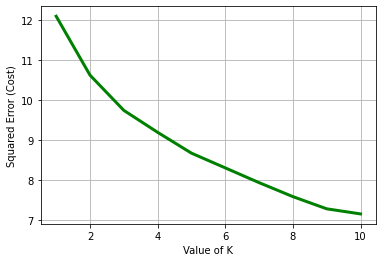

In [51]:
cost = []
for i in range (1, 11):
    KM = KMeans(n_clusters=i, random_state=0, max_iter = 500)
    KM.fit(NY_grouped_clustering)
    cost.append(KM.inertia_)
    
#plot the cost against K values
plt.plot(range(1, 11), cost, color = 'g', linewidth = '3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.grid()
plt.show()

##### From the graph we can find that the elbow of the curve points at 5, so let's choose it as our argument for number of clusters.

In [53]:
kclusters = 5

NY_grouped_clustering = NY_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NY_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

In [ ]:
# #drop cluster field after reruning clustering process using different number of clusters

# neighborhoods_venues_sorted.drop(columns=['Cluster Labels'], inplace=True)
# neighborhoods_venues_sorted.reset_index(drop=True, inplace=True)

In [54]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge restaurant data with neighborhood location to add latitude/longitude for each neighborhood
NY_merged = df_NY
NY_merged = NY_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
NY_merged = NY_merged.dropna()
NY_merged.reset_index(drop=True, inplace=True)

# create output table with clusters assigned
NY_Output = NY_merged.sort_values(by=['Cluster Labels','1st Most Common Venue','2nd Most Common Venue'])

print(NY_Output.shape)
NY_Output.head(10)

(111, 11)


,Borough,Neighborhood,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
24,Brooklyn CB 5,City Line,Brooklyn CB5 City Line,40.676225,-73.886962,0.0,African Restaurant,Latin American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Chinese Restaurant
11,Bronx CB 12,Eastchester,Bronx CB12 Eastchester,40.888060,-73.830986,0.0,Caribbean Restaurant,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant
107,Staten Island CB 1,Stapleton,Staten Island CB1 Stapleton,40.627957,-74.075165,0.0,Chinese Restaurant,Asian Restaurant,Mexican Restaurant,Sri Lankan Restaurant,Fast Food Restaurant
12,Bronx CB 12,Williamsbridge,Bronx CB12 Williamsbridge,40.879014,-73.875758,0.0,Chinese Restaurant,Brazilian Restaurant,Fast Food Restaurant,Spanish Restaurant,Caribbean Restaurant
34,Brooklyn CB 11,Bath Beach,Brooklyn CB11 Bath Beach,40.601850,-74.000501,0.0,Chinese Restaurant,Cantonese Restaurant,Italian Restaurant,Japanese Restaurant,Eastern European Restaurant
35,Brooklyn CB 13,Bensonhurst,Brooklyn CB13 Bensonhurst,40.604977,-73.993406,0.0,Chinese Restaurant,Cantonese Restaurant,Japanese Restaurant,Fast Food Restaurant,Sushi Restaurant
55,Manhattan CB 3,Two Bridges,Manhattan CB3 Two Bridges,40.711288,-73.992233,0.0,Chinese Restaurant,Cantonese Restaurant,Malay Restaurant,Mexican Restaurant,Latin American Restaurant
1,Bronx CB 3,Concourse Village,Bronx CB3 Concourse Village,40.873909,-73.876817,0.0,Chinese Restaurant,Caribbean Restaurant,Mexican Restaurant,Fast Food Restaurant,American Restaurant
105,Queens CB 13,Queens Village,Queens CB13 Queens Village,40.717572,-73.735933,0.0,Chinese Restaurant,Caribbean Restaurant,Mexican Restaurant,Filipino Restaurant,Portuguese Restaurant
95,Queens CB 8,Utopia,Queens CB8 Utopia,40.727325,-73.786522,0.0,Chinese Restaurant,Japanese Restaurant,Thai Restaurant,Ramen Restaurant,Italian Restaurant


In [61]:
# #Below need to run only if NaN values identified in NY_Output

# NY_Output.dropna(inplace=True)
# NY_Output.reset_index(drop=True, inplace=True)
# print(NY_Output.shape)
# NY_Output.head(5)

### Mapping clustered neighborhoods

In [55]:
# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NY_Output['Latitude'], NY_Output['Longitude'], NY_Output['Neighborhood'], NY_Output['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Exploratory Data Analysis

Let's examine most common type of restaurant in each cluster

In [94]:
df = NY_Output[['Cluster Labels','1st Most Common Venue']]
df = df.groupby(['Cluster Labels','1st Most Common Venue'])['1st Most Common Venue'].count()
df = pd.DataFrame(df)
df = df.rename(columns = {'1st Most Common Venue':'Total'})
df = df.reset_index()

In [ ]:
# print(df.shape)
# df.head()

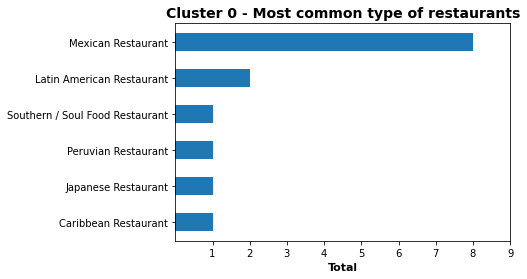

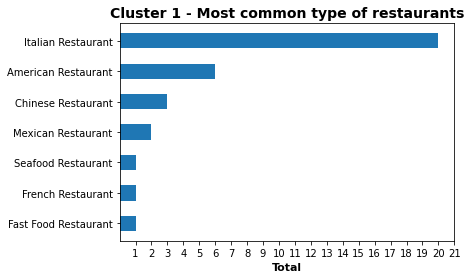

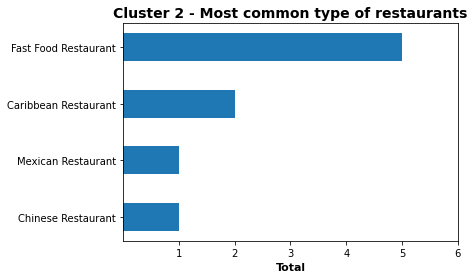

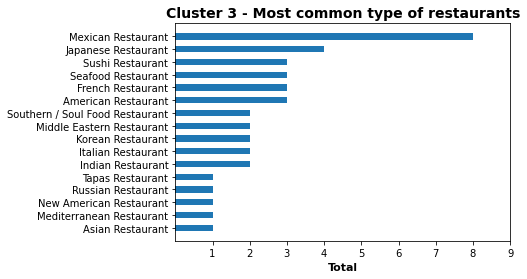

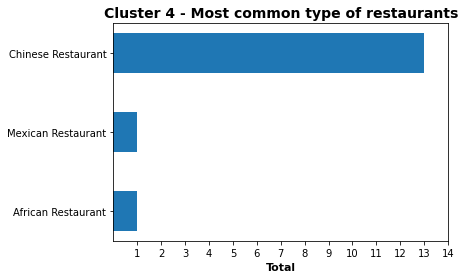

In [96]:
#Plot top most common restaurant type for each cluster
for i in range(0, 5):
    cl = df[df['Cluster Labels'] == i]
    cl = cl[['1st Most Common Venue','Total']].set_index('1st Most Common Venue').sort_values('Total', ascending=True)
    column = cl["Total"]
    max_value = column.max()

    y_axis = cl.index
    x_axis = cl['Total']

    plt.barh(y_axis, x_axis, height=0.5, color='tab:blue')
    plt.title('Cluster {} - Most common type of restaurants'.format(i), fontweight ='bold', fontsize = 14)
    #plt.ylabel('1st Most Common Venue')
    plt.xlabel('Total', fontweight ='bold', fontsize = 11)
    plt.xticks(range(1,max_value+2))
    plt.show()


Now let's examine 2nd most common type of restaurant in each cluster to support our restaurant type choice for each neighborhood.

In [98]:
df2 = NY_Output[['Cluster Labels','2nd Most Common Venue']]
df2 = df2.groupby(['Cluster Labels','2nd Most Common Venue'])['2nd Most Common Venue'].count()
df2 = pd.DataFrame(df2)
df2 = df2.rename(columns = {'2nd Most Common Venue':'Total'})
df2 = df2.reset_index()

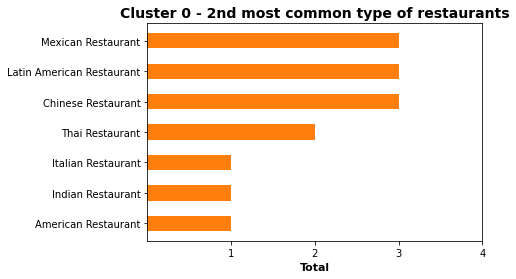

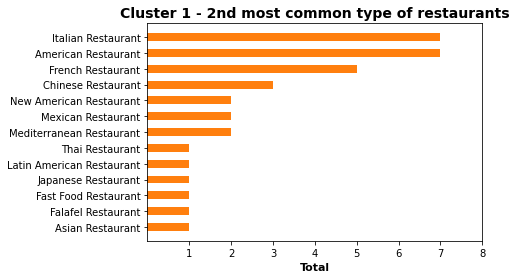

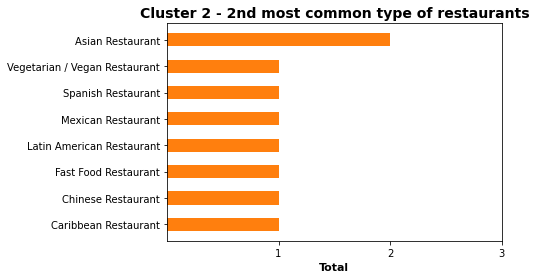

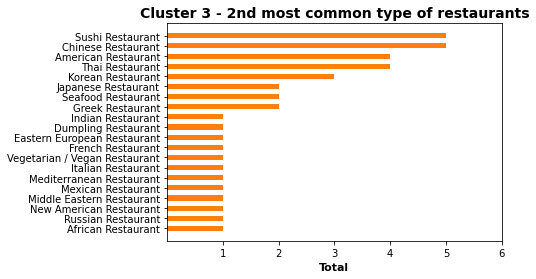

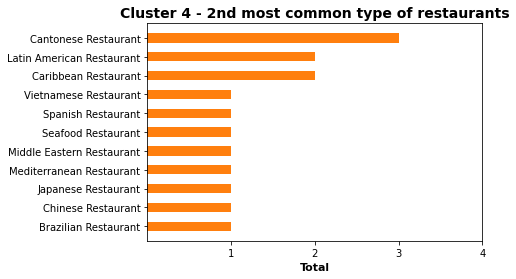

In [99]:
#Plot 2nd most common restaurant type for each cluster
for i in range(0, 5):
    cl = df2[df2['Cluster Labels'] == i]
    cl = cl[['2nd Most Common Venue','Total']].set_index('2nd Most Common Venue').sort_values('Total', ascending=True)
    column = cl["Total"]
    max_value = column.max()

    y_axis = cl.index
    x_axis = cl['Total']

    plt.barh(y_axis, x_axis, height=0.5, color='tab:orange')
    plt.title('Cluster {} - 2nd most common type of restaurants'.format(i), fontweight ='bold', fontsize = 14)
    #plt.ylabel('1st Most Common Venue')
    plt.xlabel('Total', fontweight ='bold', fontsize = 11)
    plt.xticks(range(1,max_value+2))
    plt.show()


We can observe that clustering porcess yeilded a solid output, where based on 1st and 2nd most common types of restaurants it's possible with relative confidence to identify cuisine preferences in each neighborhood. 

Detailed analysis of results is provided in project report and presentation. 